In [11]:
import os
import cv2
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from imutils.paths import list_images

In [2]:
pokemon_db = "../data/Pokemon Images DB"

# Dataset Extaction Procedure

In [4]:
images_list = list(list_images(pokemon_db))
images_list[:5]

['../data/Pokemon Images DB/Pokemon Images DB/Mandibuzz/Mandibuzz.png',
 '../data/Pokemon Images DB/Pokemon Images DB/Mandibuzz/Mandibuzz_new.png',
 '../data/Pokemon Images DB/Pokemon Images DB/Hisuian Voltorb/Hisuian Voltorb_new.png',
 '../data/Pokemon Images DB/Pokemon Images DB/Hisuian Voltorb/Hisuian Voltorb.png',
 '../data/Pokemon Images DB/Pokemon Images DB/Corviknight/Corviknight.png']

In [9]:
images_list_filtered = []

for image_name in images_list:
    if "_new" not in image_name:
        images_list_filtered.append(image_name)

In [10]:
images_list_filtered[:5]

['../data/Pokemon Images DB/Pokemon Images DB/Mandibuzz/Mandibuzz.png',
 '../data/Pokemon Images DB/Pokemon Images DB/Hisuian Voltorb/Hisuian Voltorb.png',
 '../data/Pokemon Images DB/Pokemon Images DB/Corviknight/Corviknight.png',
 '../data/Pokemon Images DB/Pokemon Images DB/Hisuian Typhlosion/Hisuian Typhlosion.png',
 '../data/Pokemon Images DB/Pokemon Images DB/Dolliv/Dolliv.png']

# How to visualize images

In [32]:
image_first = images_list_filtered[-1]
image = cv2.imread(image_first)
# RGB -> BGR
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [33]:
image.shape

(801, 846, 3)

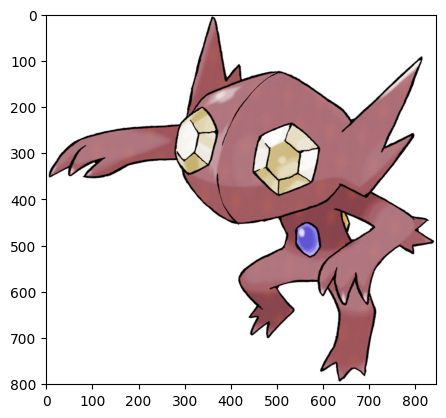

In [34]:
plt.imshow(image)

In [35]:
image_first

'../data/Pokemon Images DB/Pokemon Images DB/Sableye/Sableye.png'

In [36]:
# aqui la imagen aparece con los colores invertidos
# es decir, la imagen que se carga aparece en BGR
# para de BGR a RGB, existe otra funcion en opencv

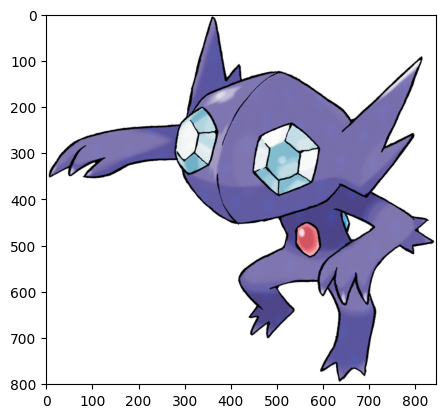

In [37]:
image = cv2.imread(image_first)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

# Aplicar filtro de blurring

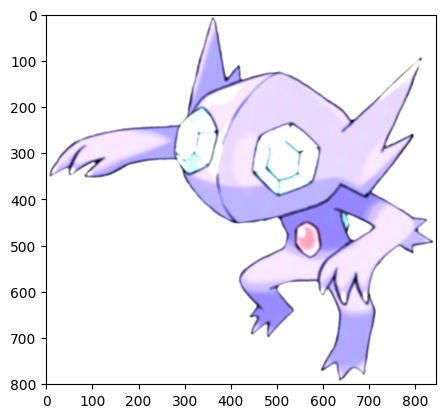

In [41]:
kernel = np.ones((7, 7), np.float32)/25
dst = cv2.filter2D(image, -1, kernel)
plt.imshow(dst)

In [44]:
# visualizamos kernel o filtro que fue aplicado sobre la imagen
# en este caso, es una matriz de 5x5 de solo unos, que fueron divididos por 25
np.ones((5, 5)) / 25

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

In [45]:
image.shape

(801, 846, 3)

In [46]:
# dividimos la imagen en sus 3 canales RGB
R, G, B = image[..., 0], image[..., 1], image[..., 2]

In [47]:
R.shape

(801, 846)

In [48]:
R

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

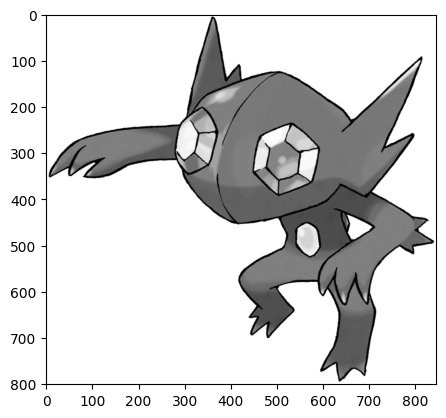

In [49]:
# mostramos y evidenciamos que el canal rojo no es tan rojo como dice ser
plt.imshow(R, cmap='gray')

In [50]:
# la imagen del pokemon N1 era pequeña
# la imagen del pokemon N2 es mas grande

# que podemos hacer para que todas las imagenes tengan el mismo tamaño

In [54]:
# base_2 = 2**8 # 256
base_2 = 224
image_size_base = (base_2, base_2)
image_size_base

(224, 224)

In [55]:
# redimensionamos la imagen para ver como queda su calidad y aspect ratio
image_resize = cv2.resize(image, image_size_base)
image_resize.shape

(224, 224, 3)

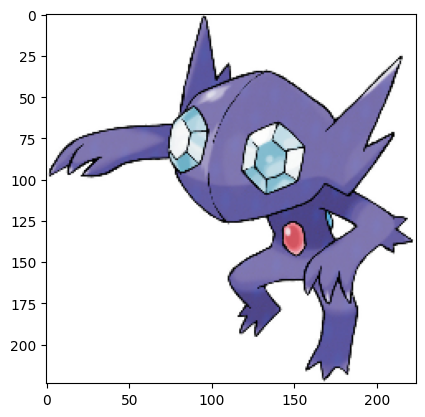

In [56]:
plt.imshow(image_resize)

In [58]:
image.shape[:2][::-1]

(846, 801)

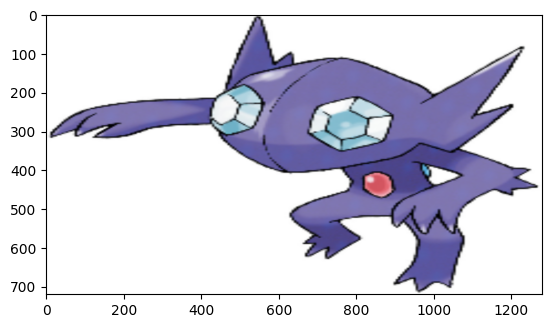

In [62]:
image_rescaled = cv2.resize(image_resize, (1280, 720)) # aspect ratio fue alterado
plt.imshow(image_rescaled)
# queda demostrado que si la imagen original no calza matematicamente con una dimension mas grande,
# la imagen se achata o se estira dependiendo del caso

# guardamos imagen

In [66]:
image_rescaled_bgr = cv2.cvtColor(image_rescaled, cv2.COLOR_RGB2BGR)
cv2.imwrite("imagen_reescalada.png", image_rescaled_bgr)

True

In [ ]:
# opencv
# PIL / pillow

# pandas
# pyspark
# numpy